In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import arviz as az
import scipy.stats as stats
from pandas import DataFrame

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
cols = df.columns[:4]

models = []
traces = []
tags = 3 # stim ca sunt 3 specii, insa nu stim sa le impartim

for col in cols:
    x = df[col]
    with pm.Model() as model:
        p = pm.Dirichlet('p', a=np.ones(tags))
        means = pm.Normal('means',
                          mu=np.linspace(x.min(), x.max(), tags),
                          sigma=10, shape=tags,
                          transform=pm.distributions.transforms.ordered)

        sd = pm.HalfNormal('sd', sigma=10)
        y = pm.NormalMixture('y', w=p, mu=means, sigma=sd, observed=x)
        
        trace = pm.sample(200, target_accept=0.9, random_seed=123, return_inferencedata=True)
        traces.append(trace)
        models.append(model)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p, means, sd]


Output()

Sampling 4 chains for 1_000 tune and 200 draw iterations (4_000 + 800 draws total) took 25 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p, means, sd]


Output()

Sampling 4 chains for 1_000 tune and 200 draw iterations (4_000 + 800 draws total) took 25 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p, means, sd]


Output()

Sampling 4 chains for 1_000 tune and 200 draw iterations (4_000 + 800 draws total) took 19 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p, means, sd]


Output()

Sampling 4 chains for 1_000 tune and 200 draw iterations (4_000 + 800 draws total) took 19 seconds.


## Pentru a gasi modelul care le clasifica cel mai bine, le vom compara folosind criteriul WAIC, similar ca la exercitiul 1, folosind acea eticheta care imparte cel mai bine setul de date

Output()

Already computed log-likelyhood
comparing with waic:                rank   elpd_waic    p_waic   elpd_diff        weight         se  \
sepal_width      0  179.888237  3.146625    0.000000  9.965654e-01  18.138311   
petal_width      1  246.936339  5.847060   67.048102  3.434573e-03  13.546922   
sepal_length     2  369.331742  4.374153  189.443505  1.337333e-28  13.938707   
petal_length     3  474.318741  7.100724  294.430504  5.871802e-52  17.890498   

                    dse  warning     scale  
sepal_width    0.000000     True  deviance  
petal_width   21.940065    False  deviance  
sepal_length  23.930411    False  deviance  
petal_length  23.907603     True  deviance  


C:\Users\Ionut\Documents\Facultate\an-3\PMP\pmp-2024\.venv\Lib\site-packages\arviz\stats\stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
C:\Users\Ionut\Documents\Facultate\an-3\PMP\pmp-2024\.venv\Lib\site-packages\arviz\stats\stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


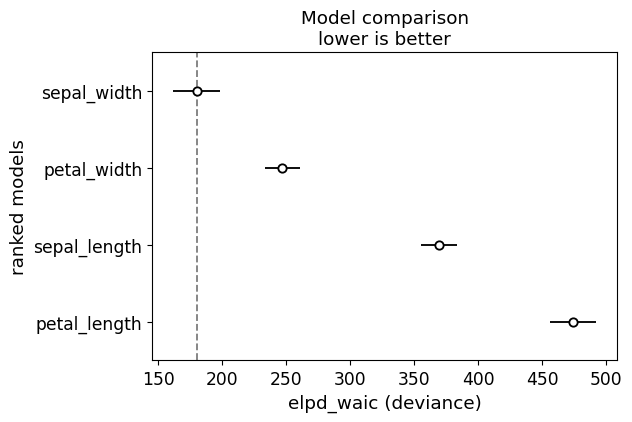

In [22]:
try:
    [pm.compute_log_likelihood(traces[i],model=models[i]) for i in range(len(cols))]
except Exception as e:
    print("Already computed log-likelyhood")
    pass

comp = az.compare(dict(zip([str(col) for col in cols], traces)),
                  method='BB-pseudo-BMA', ic="waic", scale="deviance")

print('comparing with waic: ', comp)
az.plot_compare(comp)
plt.show()

# Exercitiul 2.b.

Se observa ca impartirea dupa **sepal_width** are acuratetea cea mai mare, deoarece are eroarea cea mai mica conform criteriului WAIC